In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import warnings
warnings.filterwarnings("ignore")


In [176]:
data=pd.read_csv('Desktop\weatherAUS.csv')
print("Total no of points ={}".format(data.shape[0]))
data

Total no of points =142193


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,20-06-2017,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [177]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [178]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data['MinTemp'].fillna(value=data['MinTemp'].mode()[0],inplace=True )
data['MaxTemp'].fillna(value=data['MaxTemp'].mode()[0],inplace=True )
data['Temp9am'].fillna(value=data['Temp9am'].mode()[0],inplace=True )
data['Temp3pm'].fillna(value=data['Temp3pm'].mode()[0],inplace=True )


In [179]:
data['MinTemp'].mode()[0]

9.6

In [180]:
data['MaxTemp'].mode()[0]

20.0

In [181]:
data['Temp9am'].mode()[0]

17.0

In [182]:
data['Temp3pm'].mode()[0]

20.0

In [183]:
data['Humidity9am'].fillna(value=data['Humidity9am'].mode()[0], inplace=True )
data['Humidity3pm'].fillna(value=data['Humidity3pm'].mode()[0], inplace=True )

In [184]:
data['Humidity9am'].mode()[0]

99.0

In [185]:
data['Humidity3pm'].mode()[0]

52.0

In [186]:
data['Rainfall'].fillna(value=0.0, inplace=True)

In [187]:
data['Pressure9am'].fillna(value=data['Pressure9am'].median(), inplace=True )
data['Pressure3pm'].fillna(value=data['Pressure3pm'].median(), inplace=True )
data['WindGustSpeed'].fillna(value=data['WindGustSpeed'].median(), inplace=True )
data['WindSpeed9am'].fillna(value=data['WindSpeed9am'].median(), inplace=True )
data['WindSpeed3pm'].fillna(value=data['WindSpeed3pm'].median(), inplace=True )


In [188]:
data['Pressure9am'].median()

1017.6

In [189]:
data['Pressure3pm'].median()

1015.2

In [190]:
data['WindGustSpeed'].median()

39.0

In [191]:
data['WindSpeed9am'].median()

13.0

In [192]:
data['WindSpeed3pm'].median()

19.0

In [193]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
data.dropna(inplace=True)

In [194]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,01-01-2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,02-01-2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,04-01-2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,05-01-2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,06-01-2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,20-06-2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0,No
139109,21-06-2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0,No
139110,22-06-2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0,No
139111,23-06-2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No


In [195]:
duplicate= data.duplicated()
print(duplicate)
print("Number of duplicate records : ", duplicate.sum())

5939      False
5940      False
5942      False
5943      False
5944      False
          ...  
139108    False
139109    False
139110    False
139111    False
139112    False
Length: 56669, dtype: bool
Number of duplicate records :  0


In [196]:
data=data.sort_values(by='Date')

In [197]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction  
data= data.drop(axis= 1, columns = ['Date', 'Location','RISK_MM'])

In [198]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [199]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
44412,13.6,34.2,0.0,8.8,12.8,NNE,35.0,ESE,W,2.0,...,50.0,20.0,1015.8,1011.6,7.0,6.0,21.9,31.8,No,No
5939,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
84886,23.6,31.4,15.8,4.6,3.4,NNE,28.0,E,N,4.0,...,77.0,70.0,1008.1,1005.6,7.0,6.0,28.0,30.1,Yes,Yes
126858,10.6,17.5,2.8,6.8,8.6,WSW,76.0,WSW,WSW,35.0,...,48.0,32.0,992.2,996.2,1.0,6.0,13.6,17.0,Yes,No
32834,17.7,35.1,0.0,9.8,12.9,S,72.0,NW,NW,15.0,...,63.0,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117530,12.1,28.9,0.0,8.0,13.2,SW,48.0,SSE,WSW,15.0,...,46.0,35.0,1016.1,1012.9,1.0,1.0,20.3,27.4,No,No
78576,16.7,26.5,0.0,8.6,11.9,WNW,28.0,W,WSW,11.0,...,61.0,47.0,1006.2,1005.2,6.0,1.0,19.4,25.1,No,No
71010,16.3,32.4,0.0,9.4,13.0,WSW,30.0,S,W,13.0,...,57.0,30.0,1008.0,1005.4,0.0,0.0,20.7,29.9,No,No
32657,24.1,30.0,0.0,8.2,4.8,SE,37.0,SSE,SE,17.0,...,57.0,62.0,1003.7,1003.4,6.0,7.0,27.7,26.4,No,No


In [200]:
data_final = data

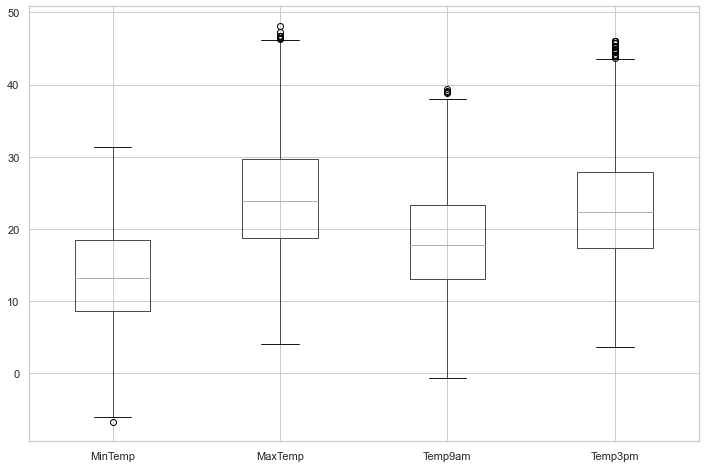

In [201]:
#Boxplot for MinTemp,MaxTemp,Temp9am and Temp3pm
pl.figure(figsize=(12, 8))
data_final.boxplot(column=['MinTemp','MaxTemp','Temp9am','Temp3pm'])

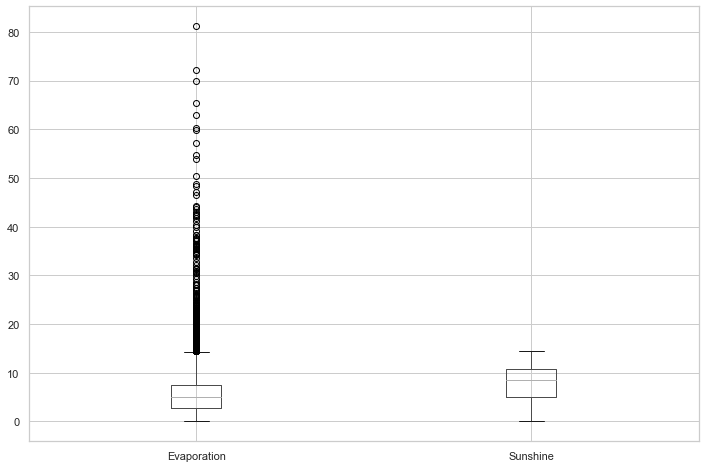

In [202]:
pl.figure(figsize=(12, 8))
data_final.boxplot(column=['Evaporation','Sunshine'])

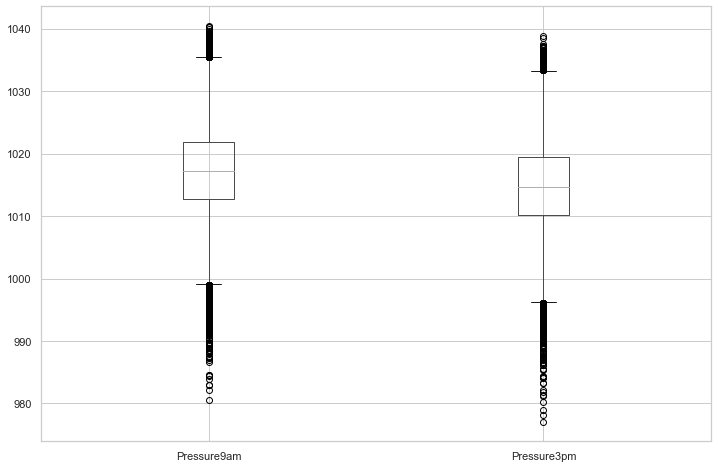

In [203]:
pl.figure(figsize=(12, 8))
data_final.boxplot(column=['Pressure9am','Pressure3pm'])

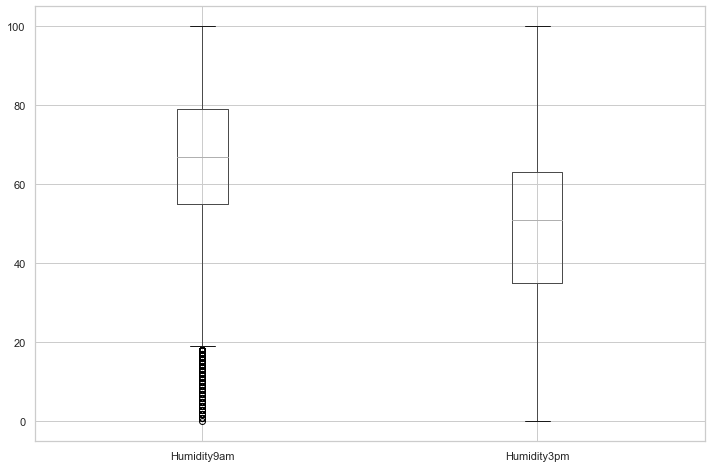

In [204]:
pl.figure(figsize=(12, 8))
data_final.boxplot(column=['Humidity9am','Humidity3pm'])

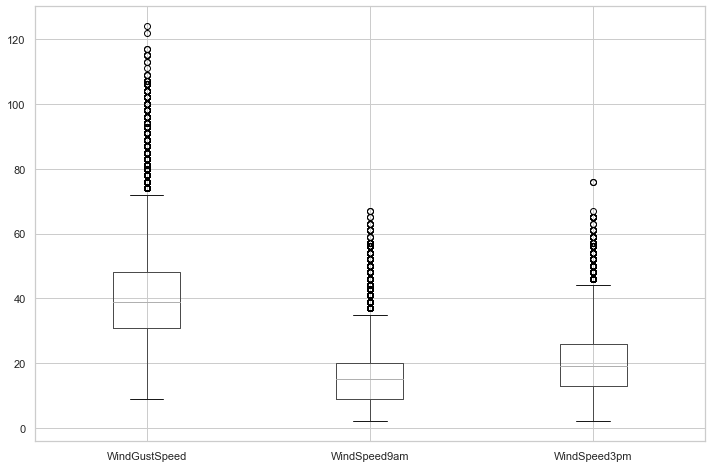

In [205]:
pl.figure(figsize=(12, 8))
data_final.boxplot(column=['WindGustSpeed','WindSpeed9am','WindSpeed3pm'])

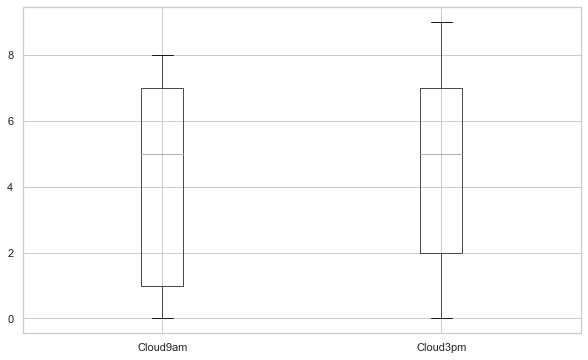

In [206]:
pl.figure(figsize=(10, 6))
data_final.boxplot(column=['Cloud9am','Cloud3pm'])

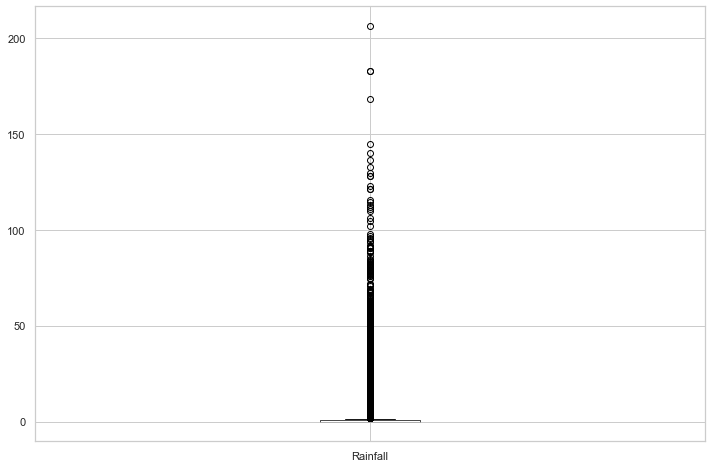

In [207]:
pl.figure(figsize=(12, 8))
data_final.boxplot(column=['Rainfall'])

In [208]:
data_final['WindGustDir']

44412     NNE
5939      SSW
84886     NNE
126858    WSW
32834       S
         ... 
117530     SW
78576     WNW
71010     WSW
32657      SE
84683      NE
Name: WindGustDir, Length: 56669, dtype: object

In [209]:
data_final['RainTomorrow']

44412      No
5939       No
84886     Yes
126858     No
32834      No
         ... 
117530     No
78576      No
71010      No
32657      No
84683      No
Name: RainTomorrow, Length: 56669, dtype: object

In [210]:
#similar process for WindDGustDir, WindDir9am,WindDir3pm,RainToday
RainTomorrow_encode = LabelEncoder()
data_final['make_code']=RainTomorrow_encode.fit_transform(data_final['RainTomorrow'])


In [211]:
print('Probability of Rain Tomorrow :', np.mean(data_final['make_code']))

Probability of Rain Tomorrow : 0.22059679895533713


In [212]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

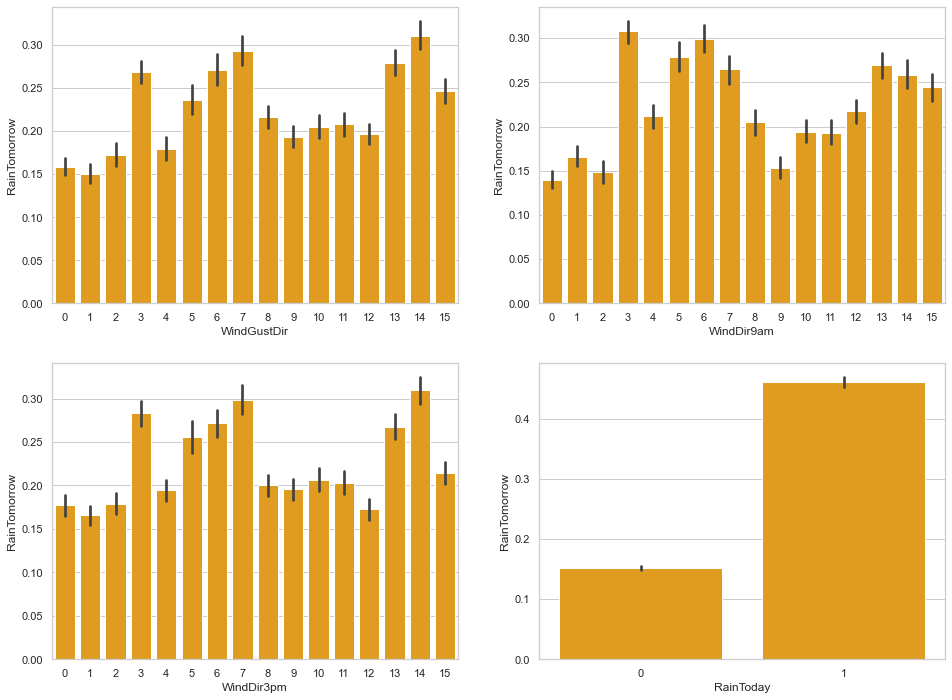

In [213]:
from numpy import mean

n_row = 2
n_col = 2
list_of_variables = [ 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
f, axes = pl.subplots(n_row, n_col, figsize=(16, 12))
k = 0
for i in list(range(n_row)):
    for j in list(range(n_col)):
        sns.barplot(x = list_of_variables[k], y = 'RainTomorrow', data = data_final, estimator = mean, color = 'orange', ax=axes[i, j])
        #g.xticks(rotation=45)
        k = k + 1

In [214]:
data_final['MinTemp'].describe()

count    56669.000000
mean        13.455604
std          6.415915
min         -6.700000
25%          8.600000
50%         13.200000
75%         18.400000
max         31.400000
Name: MinTemp, dtype: float64

In [215]:
IQR = data.MinTemp.quantile(0.75) - data.MinTemp.quantile(0.25)
Lower_fence = data.MinTemp.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.MinTemp.quantile(0.75) + (IQR * 1.5)
print('MinTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


MinTemp outliers are values < -6.1 or > 33.099999999999994


In [216]:
data_final['MaxTemp'].describe()

count    56669.000000
mean        24.208474
std          6.973185
min          4.100000
25%         18.700000
50%         23.900000
75%         29.700000
max         48.100000
Name: MaxTemp, dtype: float64

In [217]:
IQR = data.MaxTemp.quantile(0.75) - data.MaxTemp.quantile(0.25)
Lower_fence = data.MaxTemp.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.MaxTemp.quantile(0.75) + (IQR * 1.5)
print('MaxTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


MaxTemp outliers are values < 2.1999999999999993 or > 46.2


In [218]:
data_final['Temp9am'].describe()

count    56669.000000
mean        18.198401
std          6.565040
min         -0.700000
25%         13.100000
50%         17.800000
75%         23.300000
max         39.400000
Name: Temp9am, dtype: float64

In [219]:
IQR = data.Temp9am.quantile(0.75) - data.Temp9am.quantile(0.25)
Lower_fence = data.Temp9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Temp9am.quantile(0.75) + (IQR * 1.5)
print( 'Temp9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Temp9am outliers are values < -2.200000000000001 or > 38.6


In [220]:
data_final['Temp3pm'].describe()

count    56669.000000
mean        22.701050
std          6.837736
min          3.700000
25%         17.400000
50%         22.400000
75%         27.900000
max         46.100000
Name: Temp3pm, dtype: float64

In [221]:
IQR = data.Temp3pm.quantile(0.75) - data.Temp3pm.quantile(0.25)
Lower_fence = data.Temp3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Temp3pm.quantile(0.75) + (IQR * 1.5)
print( 'Temp3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Temp3pm outliers are values < 1.6499999999999986 or > 43.65


In [222]:
data_final['Evaporation'].describe()

count    56669.000000
mean         5.500568
std          3.696426
min          0.000000
25%          2.800000
50%          5.000000
75%          7.400000
max         81.200000
Name: Evaporation, dtype: float64

In [223]:
IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 1.5)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -4.1000000000000005 or > 14.3


In [224]:
data_final['Pressure9am'].describe()

count    56669.000000
mean      1017.241989
std          6.908022
min        980.500000
25%       1012.700000
50%       1017.200000
75%       1021.800000
max       1040.400000
Name: Pressure9am, dtype: float64

In [225]:
IQR = data.Pressure9am.quantile(0.75) - data.Pressure9am.quantile(0.25)
Lower_fence = data.Pressure9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Pressure9am.quantile(0.75) + (IQR * 1.5)
print('Pressure9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Pressure9am outliers are values < 999.0500000000002 or > 1035.4499999999998


In [226]:
data_final['Pressure3pm'].describe()

count    56669.000000
mean      1014.798994
std          6.870769
min        977.100000
25%       1010.100000
50%       1014.700000
75%       1019.400000
max       1038.900000
Name: Pressure3pm, dtype: float64

In [227]:
IQR = data.Pressure3pm.quantile(0.75) - data.Pressure3pm.quantile(0.25)
Lower_fence = data.Pressure3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Pressure3pm.quantile(0.75) + (IQR * 1.5)
print('Pressure3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Pressure3pm outliers are values < 996.1500000000001 or > 1033.35


In [228]:
data_final['Humidity9am'].describe()

count    56669.000000
mean        65.947237
std         18.562476
min          0.000000
25%         55.000000
50%         67.000000
75%         79.000000
max        100.000000
Name: Humidity9am, dtype: float64

In [229]:
IQR = data.Humidity9am.quantile(0.75) - data.Humidity9am.quantile(0.25)
Lower_fence = data.Humidity9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Humidity9am.quantile(0.75) + (IQR * 1.5)
print('Humidity9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Humidity9am outliers are values < 19.0 or > 115.0


In [230]:
data_final['WindGustSpeed'].describe()

count    56669.000000
mean        40.876193
std         13.341210
min          9.000000
25%         31.000000
50%         39.000000
75%         48.000000
max        124.000000
Name: WindGustSpeed, dtype: float64

In [231]:
IQR = data.WindGustSpeed.quantile(0.75) - data.WindGustSpeed.quantile(0.25)
Lower_fence = data.WindGustSpeed.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.WindGustSpeed.quantile(0.75) + (IQR * 1.5)
print('WindGustSpeed outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindGustSpeed outliers are values < 5.5 or > 73.5


In [232]:
data_final['WindSpeed9am'].describe()

count    56669.000000
mean        15.664667
std          8.318833
min          2.000000
25%          9.000000
50%         15.000000
75%         20.000000
max         67.000000
Name: WindSpeed9am, dtype: float64

In [233]:
IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -7.5 or > 36.5


In [234]:
data_final['WindSpeed3pm'].describe()

count    56669.000000
mean        19.783391
std          8.513286
min          2.000000
25%         13.000000
50%         19.000000
75%         26.000000
max         76.000000
Name: WindSpeed3pm, dtype: float64

In [235]:
IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -6.5 or > 45.5


In [236]:
data_final['Rainfall'].describe()

count    56669.000000
mean         2.133350
std          7.010917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        206.200000
Name: Rainfall, dtype: float64

In [237]:
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 1.5)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -0.8999999999999999 or > 1.5


In [238]:
(data_final['MaxTemp']>46.2).sum()

9

In [239]:
index=data_final[(data_final['MaxTemp']>46.2)|(data_final['MaxTemp']<2.2)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['Temp9am']>38.6)|(data_final['Temp9am']< -2.2)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['Temp3pm']>43.65)|(data_final['Temp3pm']< 1.65)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['Humidity9am']>115.0)|(data_final['Humidity9am']< 19.0)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['Pressure9am']>1028.7)|(data_final['Pressure9am']< 1005.8)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['Pressure3pm']>1033.35)|(data_final['Pressure3pm']< 996.15)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['Evaporation']>14.3)|(data_final['Evaporation']< -4.1)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['WindGustSpeed']>73.5)|(data_final['WindGustSpeed']< 5.5)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['WindSpeed9am']>36.5)|(data_final['WindSpeed9am']< -7.5)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['WindSpeed3pm']>45.5)|(data_final['WindSpeed3pm']< -6.5)].index
data_final.drop(index,inplace=True)

index=data_final[(data_final['Rainfall']>1.5)|(data_final['Rainfall']< -0.9)].index
data_final.drop(index,inplace=True)

In [240]:
data_final

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,make_code
44412,13.6,34.2,0.0,8.8,12.8,5,35.0,2,13,2.0,...,20.0,1015.8,1011.6,7.0,6.0,21.9,31.8,0,0,0
5939,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0
117891,19.1,36.5,0.0,11.6,13.1,0,37.0,0,10,15.0,...,52.0,1010.5,1007.7,0.0,0.0,22.6,35.4,0,0,0
81877,22.2,33.9,0.0,9.0,6.9,13,44.0,9,5,4.0,...,65.0,1007.4,1005.1,5.0,7.0,29.7,30.9,0,0,0
96977,12.6,17.0,0.8,4.8,6.5,12,56.0,12,12,28.0,...,43.0,1008.3,1011.6,7.0,5.0,14.3,16.6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65568,16.0,25.2,0.0,8.6,11.9,10,41.0,12,10,11.0,...,48.0,1006.3,1005.4,6.0,1.0,18.6,23.5,0,0,0
117530,12.1,28.9,0.0,8.0,13.2,12,48.0,10,15,15.0,...,35.0,1016.1,1012.9,1.0,1.0,20.3,27.4,0,0,0
78576,16.7,26.5,0.0,8.6,11.9,14,28.0,13,15,11.0,...,47.0,1006.2,1005.2,6.0,1.0,19.4,25.1,0,0,0
71010,16.3,32.4,0.0,9.4,13.0,15,30.0,8,13,13.0,...,30.0,1008.0,1005.4,0.0,0.0,20.7,29.9,0,0,0


In [241]:
data_final.to_csv("Desktop/Filtered data.csv")